# House price

---

Le but de ce notebook est d'étudier un jeu de données de maison pour ainsi deviner le prix des maisons à partir de leur descriptif. Le jeu de données est accompagné d'un descriptif des variables. Si jamais vous n'arrivez pas à le récupérer sur git, il est aussi disponible à [cette adresse](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [1]:
# Import des bibliothèques pertinentes

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from xgboost import XGBRegressor

# Partie 1 : analyse de la qualité des données

1) Importer les données. Combien de lignes possède-t-on ? Combien de colonnes ?
2) Bon sang ! ça fait beaucoup de colonnes ! Parmi les colonnes, combien possèdent moins de 10 % de données non nulles ? Ce chiffre vous étonne-t-il ?
2) Quelles sont les 10 colonnes avec le plus de variables manquantes ?
3) Parmi les colonnes, combien possèdent 90 % de valeurs identiques ? Ce chiffre vous étonne-t-il ?
4) Y a-t-il des doublons dans le jeu de données ?

In [2]:
# Récupération des données
train_house = pd.read_csv("house_data/train.csv")

In [3]:
# Question 2)
print(f"Notre dataframe contient {len(train_house)} lignes et {len(train_house.columns)} colonnes.")

Notre dataframe contient 1460 lignes et 81 colonnes.


In [4]:
train_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Question 2)
print(f"Il y a {sum(train_house.isna().sum() > (len(train_house) * 0.9))} colonnes avec plus de 90 % de données vides.")

Il y a 3 colonnes avec plus de 90 % de données vides.


In [8]:
# Afin de répondre à la question, on essaye d'identifier les trois colonnes avec des données manquantes.
train_house.isna().sum()[train_house.isna().sum() > (len(train_house) * 0.9)]
# On se rend compte qu'il s'agit de colonnes en rapport avec des détails "de luxe" (piscines et Allée).
# La plupart des maisons ne doivent pas en avoir.

Alley          1369
PoolQC         1453
MiscFeature    1406
dtype: int64

In [9]:
train_house.groupby(["Street"]).count()["Id"].max()

1454

In [10]:
# Question 3) On possède un petit dataframe. On peut faire un groupby et compter le nombre de valeurs égales.
# Note : pour les plus grosses bases de données, on cherchera des méthodes plus intelligentes (regarder la médiane et les quartiles)
list_col_identical = []
for my_col in train_house.columns:
    if my_col != "Id":
        if train_house.groupby([my_col]).count()["Id"].max() >= (len(train_house) * 0.9):
            list_col_identical.append(my_col)

In [11]:
print(f"On possède {len(list_col_identical)} colonnes avec 90 % des valeurs identiques au moins. Ces colonnes sont les suivantes : {list_col_identical}.")

On possède 18 colonnes avec 90 % des valeurs identiques au moins. Ces colonnes sont les suivantes : ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'].


# Partie 2) Compréhension du prix des maisons.
1) Tracez la distribution du prix des maisons. Que remarque-t-on ?
2) De façon intuitive, le prix dépend de la taille. Tracez le prix des maisons en fonction de leur taille. Y a-t-il une relation linéaire ? Si oui, tracez sur votre graphe la droite.
3) Identifiez les outliers de la question d'avant.
4) Quelles sont les variables les plus corrélées avec le prix des maisons ?
5) Certaines variables semblent redondantes. Quelles sont les variables avec une très forte corrélation entre elles ?
5) Trouvez une visualisation pertinente qui relie le lien entre le prix des maisons et leur note globale.
6) Les maisons récentes sont-elles plus chères que les maisons anciennes ?

In [12]:
# Question 1)
# Première constatation : les prix sont répartis avec une distribution qui ressemble à la distribution exponentielle.
# Constatation rassurante, on ne possède aucune maison avec des prix nuls ou négatifs.

fig = px.histogram(train_house, x="SalePrice", marginal="box", title = "Nombre de maisons par prix")
fig.add_vline(x=train_house["SalePrice"].mean(), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=train_house["SalePrice"].median(), line_width=3, line_dash="dash", line_color="green")
fig.show()

In [13]:
# Première constatation : Afin d'avoir un peu de lisibilité, on applique un log à la valeur.
# On constate que le résultat est plus immédiatement séparable.
train_house["logPrice"] = train_house["SalePrice"].apply(lambda x : np.log10(x+1))
fig = px.histogram(train_house, x="logPrice", marginal="box", title = "Nombre de maisons par prix (log de prix utilisé)")
fig.add_vline(x=train_house["logPrice"].mean(), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=train_house["logPrice"].median(), line_width=3, line_dash="dash", line_color="green")
fig.show()

<Axes: >

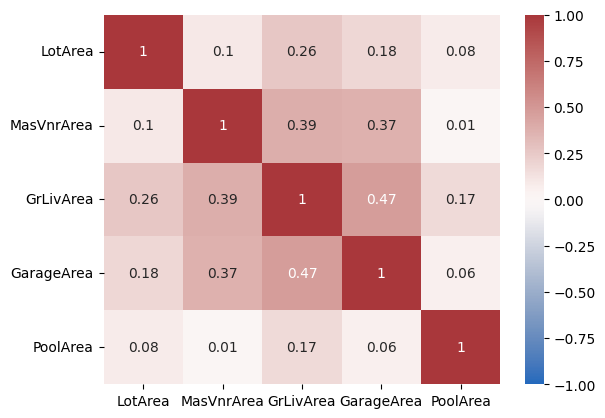

In [14]:
col_taille = [my_col for my_col in train_house.columns if "Area" in my_col]
matrix = train_house[col_taille].corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [15]:
# On constate qu'on possède 5 colonnes de tailles.
# On veut traver avec plotly les graphes et rajouter une droite
# Question : que tracer en X et que tracer en y et pourquoi ?

for my_col in col_taille:
    fig = px.scatter(train_house, x=my_col, y="SalePrice", title=f"Prix de la maison en fonction de {my_col}")
    fig.show()

In [16]:
# On ne va pas s'intéresser à PoolArea et de MasVnrArea
col_interest = ["GarageArea", "GrLivArea", "LotArea"]

for my_col in col_interest:
    fig = go.Figure()
    coef_directeur = (train_house.loc[train_house[my_col] > 0]["SalePrice"] / train_house.loc[train_house[my_col] > 0][my_col]).mean()
    fig.add_trace(go.Scatter(x=train_house[my_col], y=train_house["SalePrice"], name=f"Prix de la maison en fonction de {my_col}", mode="markers"))
    fig.add_trace(go.Scatter(x=[k for k in range(0, int(max(train_house["SalePrice"])//coef_directeur), 100)], y=[k * coef_directeur for k in range(0, int(max(train_house["SalePrice"])//coef_directeur), 100)], name="Approximation linéaire",mode="lines"))
    fig.update_layout(title=f"Prix de la maison en fonction de {my_col}", xaxis_title=f"Taille de {my_col}", yaxis_title="Prix de la maison")
    fig.show()

In [17]:
# Question 3) Trouvons les outliers de la question d'avant.
# Notamment les LotArea plus grands que 50k sont louches
train_house.loc[train_house["LotArea"] > 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logPrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,5.585462
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,Shed,500,6,2007,WD,Normal,277000,5.442481
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,375000,5.574032
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,5.359743
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,240000,5.380213
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,12,2006,WD,Normal,280000,5.447160
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,3,2008,WD,Normal,256000,5.408242
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,302000,5.480008
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,5.730783
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,5.204123


In [18]:
# Cependant GrLivArea semble plus pertinent comme variable (valeurs plus serrées). Les deux outliers sont :
train_house.loc[(train_house["GrLivArea"] > 4000) & (train_house["SalePrice"] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logPrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,5.266587
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,5.204123


In [19]:
# On constate d'ailleurs que notre prix va beaucoup dépendre de l'environnement de notre maison.
sale_area = train_house.groupby("MSZoning")[["LotArea", "SalePrice"]].mean()
sale_area["square_feet_price"] = sale_area["SalePrice"] / sale_area["LotArea"]
sale_area

,LotArea,SalePrice,square_feet_price
MSZoning,,,
C (all),9501.300000,74528.000000,7.843979
FV,6638.861538,214014.061538,32.236560
RH,7380.062500,131558.375000,17.826187
RL,11571.814075,191004.994787,16.506055
RM,6379.775229,126316.830275,19.799574


In [20]:
# On constate d'ailleurs que notre prix va beaucoup dépendre de l'environnement de notre maison.
sale_type = train_house.groupby("SaleType")[["LotArea", "SalePrice"]].mean()
sale_type["square_feet_price"] = sale_type["SalePrice"] / sale_type["LotArea"]
sale_type

,LotArea,SalePrice,square_feet_price
SaleType,,,
COD,9599.302326,143973.255814,14.998304
CWD,9028.500000,210600.000000,23.326134
Con,9743.000000,269600.000000,27.671149
ConLD,9754.333333,138780.888889,14.227614
ConLI,10700.000000,200390.000000,18.728037
ConLw,7956.800000,143700.000000,18.060024
New,11179.000000,274945.418033,24.594813
Oth,9258.666667,119850.000000,12.944628
WD,10507.902131,173401.836622,16.502041


In [21]:
# On constate d'ailleurs que notre prix va beaucoup dépendre de l'environnement de notre maison.
sale_condition = train_house.groupby("SaleCondition")[["LotArea", "SalePrice"]].mean()
sale_condition["square_feet_price"] = sale_condition["SalePrice"] / sale_condition["LotArea"]
sale_condition

,LotArea,SalePrice,square_feet_price
SaleCondition,,,
Abnorml,9450.801980,146526.623762,15.504147
AdjLand,8002.500000,104125.000000,13.011559
Alloca,11499.583333,167377.416667,14.555085
Family,9604.050000,149600.000000,15.576762
Normal,10543.478297,175202.219533,16.617118
Partial,11254.920000,272291.752000,24.193131


In [22]:
# Note : on a souvent des valeurs en doublon sur les colonnes condition et type. Sans doute faut-il simplifier cela.

<Axes: >

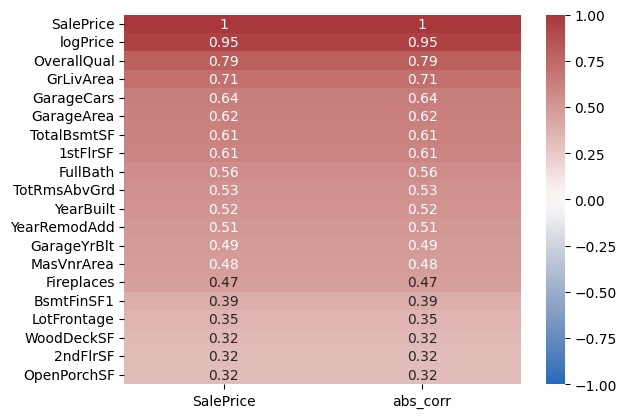

In [23]:
# Question 4) Trouvons les variables les plus corrélées ?
# On va calculer la matrice de corrélation et ensuite on classe par corrélation.
# Note : on classe par valeur absolue parce que une corrélation négative est aussi importante qu'une corrélation positive.

corr_val = train_house.corr(numeric_only=True)[["SalePrice"]]
corr_val["abs_corr"] = corr_val["SalePrice"].apply(abs)
sns.heatmap(corr_val.sort_values("abs_corr", ascending=False).head(20), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

Quel est le problème avec l'approche précédente ? On ignore les variables textuelles. On contate notamment que beaucoup d'entre elles sont des variables hierarchiques. Transformons les et voyons si nous sommes capables de raffiner notre analyse.

In [24]:
# {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'} ==> ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond
# {'Gd', 'Av', 'Mn', 'No', 'NA'} ==> BsmtExposure
# {'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'} ==> BsmtFinType1, BsmtFinType2
# {'Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal' } ==> Functional
# {'Fin', 'RFn', 'Unf', 'NA' } ==> GarageFinish
# {'GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'} ==> Fence

# Pour chacun des groupes de colonnes, on va faire un mapping d'une valeur de départ à une valeur d'arrivée. On va exploiter la hierarchie des dolonnes.

In [25]:
# On crée un dictionnaire pour faire le lien entre les valeurs de départ et d'arrivées.

list1_col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
map1_col = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0}

list2_col = ['BsmtExposure']
map2_col = {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0}

list3_col = ['BsmtFinType1', 'BsmtFinType2']
map3_col = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0}

list4_col = ['Functional']
map4_col = {'Typ' : 7, 'Min1' : 6, 'Min2' : 5, 'Mod' : 4, 'Maj1' : 3, 'Maj2' : 2, 'Sev' : 1, 'Sal' : 0}

list5_col = ['GarageFinish']
map5_col = {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' : 0}

list6_col = ['Fence']
map6_col = {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'NA' : 0}

def map_col_to_dict(train_house, col_name, col_map):
    return train_house[col_name].replace(col_map)

In [26]:
for my_col in list1_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map1_col)

for my_col in list2_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map2_col)

for my_col in list3_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map3_col)

for my_col in list4_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map4_col)

for my_col in list5_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map5_col)

for my_col in list6_col:
    train_house[my_col] = map_col_to_dict(train_house, my_col, map6_col)

<Axes: >

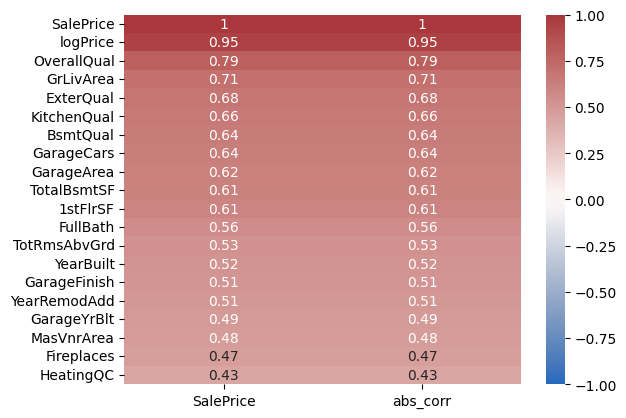

In [27]:
# Deuxième matrice de corrélation. On se rend compte que certaines des variables évoquées plus tôt apparaissent.

corr_val = train_house.corr(numeric_only=True)[["SalePrice"]]
corr_val["abs_corr"] = corr_val["SalePrice"].apply(abs)
sns.heatmap(corr_val.sort_values("abs_corr", ascending=False).head(20), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

<Axes: >

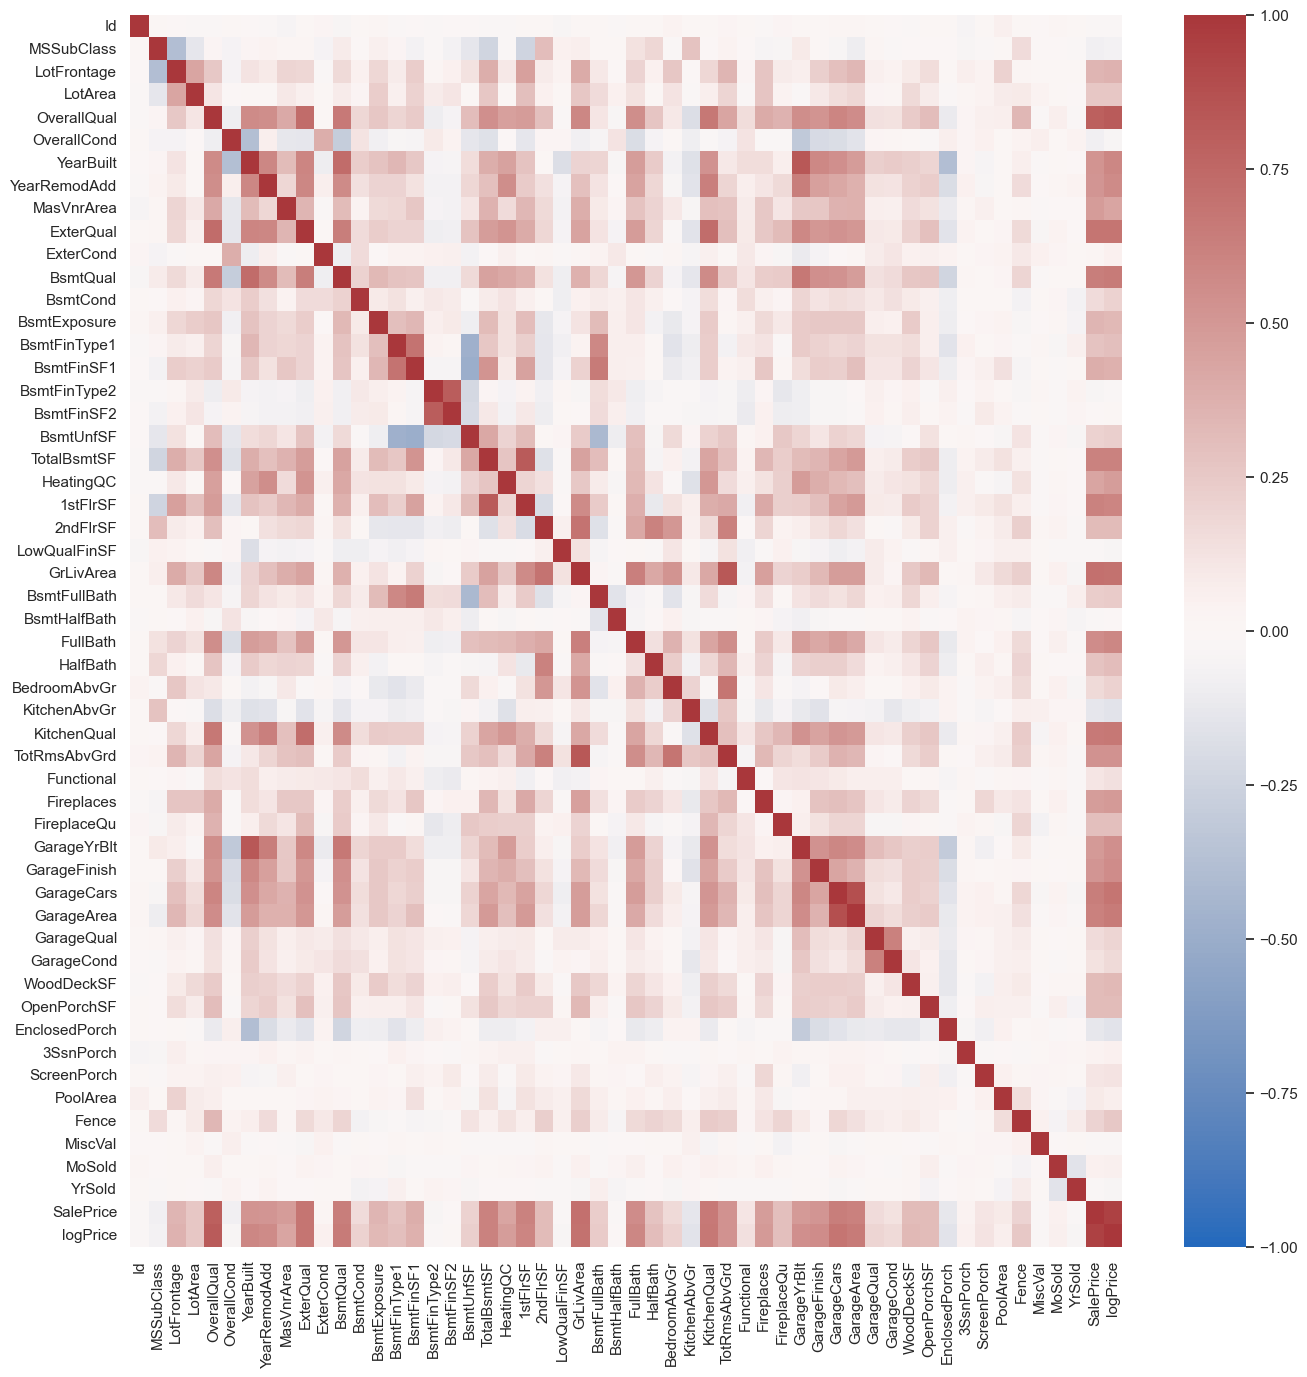

In [28]:
# Question 5) On va obtenir une immense matrice. C'est coton.

corr_val = train_house.corr(numeric_only=True).round(2)
sns.set(rc={"figure.figsize":(16, 16)})
sns.heatmap(corr_val, vmax=1, vmin=-1, center=0, cmap='vlag', annot=False)

In [29]:
# Pour regarder les corrélations, il faut aller colonne par colonne et isoler les valeurs au dela d'un seuil.

In [30]:
# Question 6)
# Quelle colonne mettre en y ? Laquelle en X ?
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_house.sort_values("OverallQual")["OverallQual"].unique(), y=train_house.sort_values("OverallQual").groupby("OverallQual")["SalePrice"].median(), name=f"Médiane du prix de vente des maisons par rapport à leur évaluation", mode="markers+lines"))
fig.add_trace(go.Scatter(x=train_house.sort_values("OverallQual")["OverallQual"].unique(), y=train_house.sort_values("OverallQual").groupby("OverallQual")["SalePrice"].quantile(0.25), name=f"Premier quartile du prix de vente des maisons par rapport à leur évaluation", mode="lines"))
fig.add_trace(go.Scatter(x=train_house.sort_values("OverallQual")["OverallQual"].unique(), y=train_house.sort_values("OverallQual").groupby("OverallQual")["SalePrice"].quantile(0.75), name=f"Troisième quartile du prix de vente des maisons par rapport à leur évaluation", mode="lines"))
fig.update_layout(title=f"Prix de la maison en fonction de leur évaluation. Premier et troisième quartile", xaxis_title=f"Evaluation", yaxis_title="Prix de la maison")
fig.show()

In [31]:
# Question 7) On regarde l'année de vente. Il n'y a pas de lien direct
fig = px.histogram(train_house.sort_values("YrSold"), x="SalePrice", marginal="box", color="YrSold", title = "Répartition des maisons en fonction de leur année de vente", barmode="overlay", opacity=0.75)
fig.show()

In [32]:
# Question 7) Les box plots sont pratiques mais un poil mystérieux. Est-ce qu'il est possible de faire quelque chose de plus simple ?
fig = px.box(train_house.sort_values("YrSold"), x="YrSold", y="SalePrice", color="YrSold", title = "Répartition des prix des maisons par années de vente")
fig.show()

In [33]:
# Question 7) Les box plots sont pratiques mais un poil mystérieux. Est-ce qu'il est possible de faire quelque chose de plus simple ?
fig = px.box(train_house.sort_values("YearBuilt"), x="YearBuilt", y="SalePrice", color="YearBuilt", title = "Répartition des prix des maisons par années de construction")
fig.show()

In [34]:
# La médiane et les quartiles donnent déjà beaucoup d'informations. Utilisons-là
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_house.sort_values("YearBuilt")["YearBuilt"].unique(), y=train_house.sort_values("YearBuilt").groupby("YearBuilt")["SalePrice"].median(), name=f"Médiane du prix de vente des maisons par années", mode="markers+lines"))
fig.add_trace(go.Scatter(x=train_house.sort_values("YearBuilt")["YearBuilt"].unique(), y=train_house.sort_values("YearBuilt").groupby("YearBuilt")["SalePrice"].quantile(0.1), name=f"1er décile du prix de vente des maisons par années", mode="lines"))
fig.add_trace(go.Scatter(x=train_house.sort_values("YearBuilt")["YearBuilt"].unique(), y=train_house.sort_values("YearBuilt").groupby("YearBuilt")["SalePrice"].quantile(0.9), name=f"9ème décile du prix de vente des maisons par années", mode="lines"))
fig.update_layout(title=f"Prix de la maison en fonction de l'année de construction. Premier et troisième quartile", xaxis_title=f"Année de construction", yaxis_title="Prix de la maison")
fig.show()

Récapitulatif de ce que l'on sait.

Relation linéaire entre taille de la maison et son prix. Great. Relation avec la qualité de la maison. Pas de relation préciser avec année de vente. Relation avec année de construction. Pas mal de colonnes vides et inutiles + redondances

# Partie 3) Préparons la partie machine learning
1) Au vue de la partie 1, quelles colonnes vous semblent pertinentes à ôter de notre dataframe ?
2) Que faire des outliers identifiés en partie 2 ?
2) Gérez les colonnes avec des valeurs manquantes.
2) Y a-t-il des variables qui mériteraient d'être transformées ? (par exemple, on possède 4 variables en rapport avec les salles de bain)
2) On constate que certaines de nos données catégoriques possèdent une hierarchie. Catégorisez-les de façon logique.
3) Catégorisez le reste des données puis normalisez les. (Note : supprimez les catégories trop rares).
3) Faites une régression linéaire. Visualisez les coefficients pour les différentes colonnes. Quelles sont les colonnes avec les plus forts coefficients ? Cela vous semble-t-il logique ?
3) Faites un ridge regression avec différentes valeurs de Alpha. Visualisez les coefficients pour les différentes colonnes. Quelles sont les colonnes avec les plus forts coefficients ? Cela vous semble-t-il logique ?
3) Essayez de faire une prédiction avec un arbre de décision (DecisionTreeRegressor). Ce modèle vous emble-t-il adapté à notre problème ?
3) Il est temps de dévoiler notre puissance ! Utilisez un XGBoost et plions ce problème comme la crêpe insignifiante qu'il a toujours été !